# Clustering
You will be asked to implement several functions.Team work is not allowed. 

Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise we will use unsupervised methods for clustering, in this case instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time.

Let's work with 2 popular methods: K-means and Mean-shift.

## Dataset
3. Iris Dataset
A classical Plant classification dataset. It contains 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica) and 4 parameters (sepal length, sepal width, petal length, petal width all in cm)

## Objectives
1. Apply previos learned methods to a different dataset
2. Understand how to evaluate them by intuition and metric values
3. implement your own mean shift algorithm

## Contents:
 

1) Iris dataset (4 points)

2) Metric based evaluation (4 points)

2) Mean shift implementation (4 points)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
%matplotlib inline 

## 1 Iris dataset
Discover the iris dataset, apply kmeans and meanshift similar to the last lab

In [2]:
# Load data
df_iris=pd.read_csv('/Users/tunayildiz/MachineLearningforSciences/Datasets/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

## Seperate Test set
This time we have labels to our dataset as well. These can be used to quantify the clustering performance only use the train part to fit your clustering

In [3]:
# DO NOT CHANGE
iris_test = df_iris.sample(frac = 0.2, random_state=42) 
iris_train = df_iris.drop(iris_test.index)

### a) Discover the dataset (1 point)
Here we check the statistics and ranges of the individual datapoints and also make sure there are no none or outlier.

Plot the distribution (4 plots), datatypes, shape and statistics

In [5]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
iris_train.shape

(120, 5)

In [8]:
iris_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.057500,3.727500,1.182500
std,0.823805,0.446398,1.751252,0.753442
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


<Axes: xlabel='petal_width', ylabel='Count'>

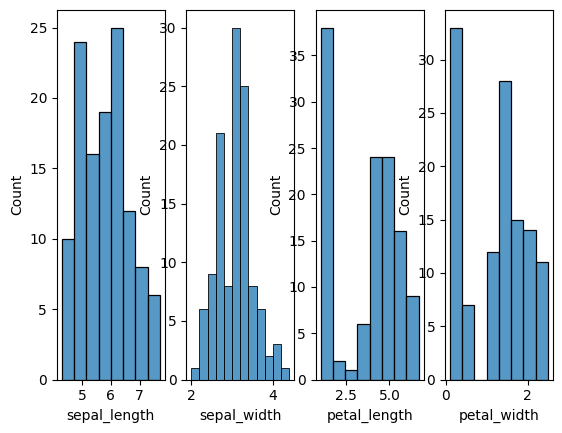

In [9]:
fig, axs = plt.subplots(ncols=4)
sns.histplot(iris_train['sepal_length'], ax=axs[0])
sns.histplot(iris_train['sepal_width'], ax=axs[1])
sns.histplot(iris_train['petal_length'], ax=axs[2])
sns.histplot(iris_train['petal_width'], ax=axs[3])

### b) Kmeans (1 point)
- Cluster, print and visualize your predictions using 3 features (try at least 2 combinations, visualize with the provided function) 


- Fit a model using all features and print the resulting clusters. This model will be used for Metric evaluation

In [10]:
from sklearn.cluster import KMeans

df1 = iris_train.iloc[:,:3]

kmeans_df1 = KMeans(n_clusters=4)

y_kmeans_df1 = kmeans_df1.fit_predict(df1)


/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
df1.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [29]:
iris_test.iloc[:,:-2].head()

,sepal_length,sepal_width,petal_length
73,6.1,2.8,4.7
18,5.7,3.8,1.7
118,7.7,2.6,6.9
78,6.0,2.9,4.5
76,6.8,2.8,4.8


In [42]:
y_test_kmeans_df1 = kmeans_df1.predict(iris_test.iloc[:,1:-1].values)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [43]:
y_test_kmeans_df1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
def visualise(data, idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data.values[:,0],data.values[:,1],data.values[:,2],marker='.', c=idx)
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_zlabel(data.columns[2])  
    plt.show()

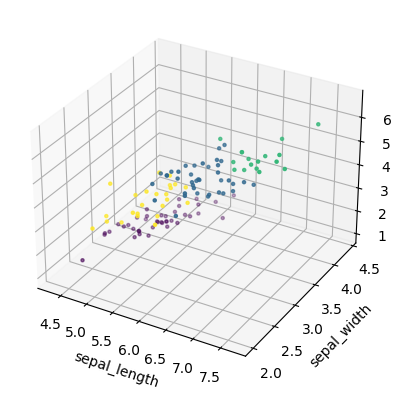

In [13]:
visualise(df1, y_kmeans_df1)

In [14]:
df2 = iris_train.iloc[:,1:4]

kmeans_df2 = KMeans(n_clusters=4)

y_kmeans_df2 = kmeans_df2.fit_predict(df1)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
y_test_kmeans_df2 = kmeans_df2.predict(iris_test.iloc[:,1:-1].values)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


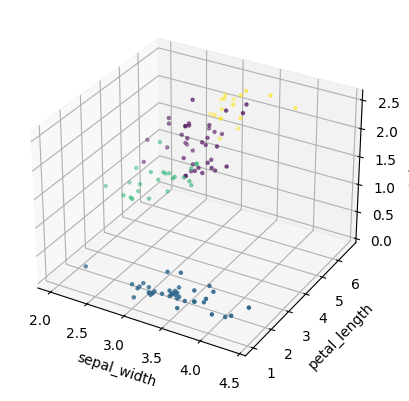

In [16]:
visualise(df2, y_kmeans_df2)

### b) Meanshift (1 point)

Fit a model using all features and print the resulting clusters. This model will be used for Metric evaluation

In [58]:
from sklearn.cluster import MeanShift
df3 = iris_train.iloc[:,:-1]
mshift = MeanShift(bandwidth=0.80)

y_meanshift_df3 = mshift.fit(df3)

In [59]:
y_meanshift = y_meanshift_df3.predict(df3)

In [61]:
y_test_meanshift = y_meanshift_df3.predict(iris_test.iloc[:,:-1].values)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MeanShift was fitted with feature names
  warnings.warn(


In [60]:
pd.Series(y_meanshift).value_counts()

0    51
1    40
2    19
3     8
4     2
dtype: int64

### Question (1 point)
Which hyperparameter did you use? why did you choose them?

which method performs better? Explain how you come to this conclusion based on the parts above (without looking at the metrics).

1. For KMeans, n_clusters = 4 was chosen because the dataset includes 4 different types of label. For Meanshift, bandwidth was adjusted so that there are 4 different labels. At bandwidth = 0.8, there were 4 different labels. 
2. Both algorithms were able to capture the differences and cluster them according to the labels given in dataset. However, to be able to make a clear distinction on which method is better, we need to look at metrics. 

## 2) Metric based Evaluation (4 points)

### Implementatinon (3 points)
First you will implement some useful metrics which can help you measure the performance of your algorithms
Then use remaining 50 samples to figure out how your model performs on unseen data

In [50]:
from sklearn.cluster import KMeans

df = iris_train.iloc[:,:-1]

kmeans = KMeans(n_clusters=4)

y_kmeans_df = kmeans.fit(df)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
y_kmeans = y_kmeans_df.predict(df)

In [51]:
y_test_kmeans = y_kmeans_df.predict(iris_test.iloc[:,:-1].values)

/Users/tunayildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [52]:
y_test_kmeans

array([0, 1, 2, 0, 0, 1, 3, 2, 0, 3, 0, 1, 1, 1, 1, 0, 2, 3, 3, 2, 1, 0,
       1, 0, 2, 0, 2, 2, 1, 1], dtype=int32)

In [53]:
# complete these functions
def calculate_majority_label(cluster:pd.Series)-> str: 
    # Calculate to which label the cluster belongs (which class occurs most often)
    return cluster.value_counts().index[0]

def coverage_of_class(cluster:pd.Series, dataset:pd.Series)-> float: 
    # calculate which percentage of the majority label is coverad by this cluster 
    majority_label = calculate_majority_label(cluster)
    # with respect to the number of occurence in the whole dataset
    cluster_count = cluster[dataset == majority_label].count() 
    dataset_count = dataset[dataset == majority_label].count()
    return cluster_count / dataset_count

def purity(cluster:pd.Series)-> float:
    # calculate the percentage of the majority class within the cluster
    majority_label = calculate_majority_label(cluster)
    return cluster[cluster == majority_label].count() / cluster.count()


In [73]:
# DO NOT CHANGE
np.set_printoptions(precision=2) # 
print('Kmeans')
clusters = np.unique(y_test_kmeans)
for i in clusters:
    print('cluster: ', i)
    cluster = iris_test['species'][y_test_kmeans==i]
    print(f'cluster {i} has a majority label of: {calculate_majority_label(iris_train["species"][y_kmeans==i])} in train label,')
    print(f'cluster {i} has a majority label of: {calculate_majority_label(cluster)},')
    print(f'covers {coverage_of_class(cluster, iris_test["species"])*100}% of this class,')
    print(f'has a purity of {purity(cluster)*100}%')

print('MeanShift')
clusters = np.unique(y_test_meanshift)
for i in clusters:
    print('cluster: ', i)
    cluster = iris_test['species'][y_test_meanshift==i]
    print(f'cluster {i} has a majority label of: {calculate_majority_label(iris_train["species"][y_meanshift==i])} in train label,')
    print(f'cluster {i} has a majority label of: {calculate_majority_label(cluster)},')
    print(f'covers {coverage_of_class(cluster, iris_test["species"])*100}% of this class,')
    print(f'has a purity of {purity(cluster)*100}%')

Kmeans
cluster:  0
cluster 0 has a majority label of: Iris-virginica in train label,
cluster 0 has a majority label of: Iris-versicolor,
covers 55.55555555555556% of this class,
has a purity of 55.55555555555556%
cluster:  1
cluster 1 has a majority label of: Iris-setosa in train label,
cluster 1 has a majority label of: Iris-setosa,
covers 100.0% of this class,
has a purity of 100.0%
cluster:  2
cluster 2 has a majority label of: Iris-virginica in train label,
cluster 2 has a majority label of: Iris-virginica,
covers 63.63636363636363% of this class,
has a purity of 100.0%
cluster:  3
cluster 3 has a majority label of: Iris-versicolor in train label,
cluster 3 has a majority label of: Iris-versicolor,
covers 44.44444444444444% of this class,
has a purity of 100.0%
MeanShift
cluster:  0
cluster 0 has a majority label of: Iris-versicolor in train label,
cluster 0 has a majority label of: Iris-versicolor,
covers 100.0% of this class,
has a purity of 90.0%
cluster:  1
cluster 1 has a majo

### Question (1 point):
- Did the metric confirm your intuition? 
- Why are metrics useful?
- Can they be missleading as well?
- When does the purity get less reliable? 
- When does the coverage get less reliable?

Hint: Does the size of the clusters effect the metrics?

Explain your answers.

1. It most commonly confirm the intuition however the clustering can be misleading. If the algorithm puts a label 1 iris to a label 0 cluster which is the majority label, unexpected results may occur. 
2. Metrics are useful to evaluate the performance and the quality of the clustering algorithm. Using metrics helps and enhances the algorithm by tuning the parameters, choose the optimal number of clusters and measure the reliability. 
3. Improper use of metrics can be misleading. There are many metrics to evaluate the performance and accuracy of the model. The wrong choice will show different type of metric which might be unrelated to the metric we are looking for. Also, some metrics can be sensitive to the size or distribution of the clusters. 
4. Purity gets less reliable when the clusters are imbalanced. For instance, the majority clss in a cluster might not represent the true distribution of the data, so in this situation purity might overestimate the quality of the clustering.
5. The coverage metrics gets less reliable when clusters are too small or only a small fraction of the labels are inside a cluster. In these cases, coverage metric might show low quality of the clustering and miss the patterns in the data.

## 3) Your own Mean-shift implementation (4 points)

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

In [ ]:
import math
from numpy import linalg as la
import numpy.matlib

In [69]:
# DO NOT MODIFY
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx)
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
def test_meanshift():
    data = np.genfromtxt('/Users/tunayildiz/MachineLearningforSciences/Datasets/toy_data.csv', delimiter=',')
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

In [70]:
def ml_meanshift(data, h, theta):

    # initialize
    shape = data.shape[0]
    modes = []
    index = np.zeros(data.shape[0], dtype=int)
    max_iter = 200


    for i in range(shape):
        q1 = data[i]
        iter = 0
        q0 = np.zeros(2)
        

        while np.linalg.norm(q1 - q0) > theta and iter < max_iter:
            q0 = q1
            numerator = np.zeros(2)
            denominator = 0
            for j in range(shape):
                kernel= np.linalg.norm(q0 - data[j]) ** 2 / h ** 2
                if kernel <= 1:
                    weight = 1 - kernel
                    numerator = numerator + (weight * data[j])
                    denominator = denominator + weight
            q1 = numerator / denominator
            iter += 1

        # Check points if they belong to the cluster.
        in_cluster = False
        for k in range(len(modes)):
            if np.linalg.norm(q1 - modes[k]) < h / 5:
                index[i] = k
                in_cluster = True
                break

        # Create new cluster if in_cluster==False
        if not in_cluster:
            modes.append(q1)
            index[i] = len(modes) - 1
    modes = np.array(modes)
    return index, modes

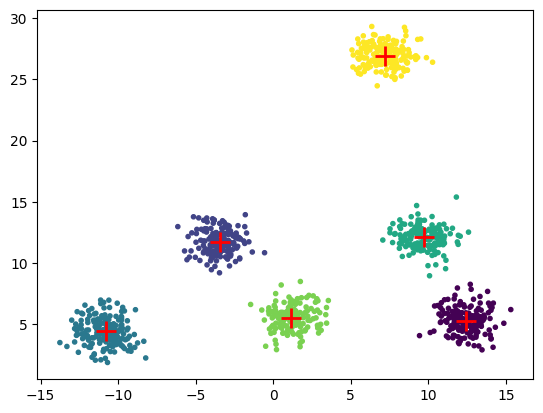

In [71]:
# test and visualise your results
test_meanshift()